<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/Wild_Blueberry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, TweedieRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


In [12]:
#loading the data
wild_blueberry = pd.read_csv('/content/WildBlueberryPollinationSimulationData.csv')
wild_blueberry.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [13]:
wild_blueberry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [14]:
#sum of null values
wild_blueberry.isnull().sum()

,0
Row#,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0


## DATA ANALYSIS

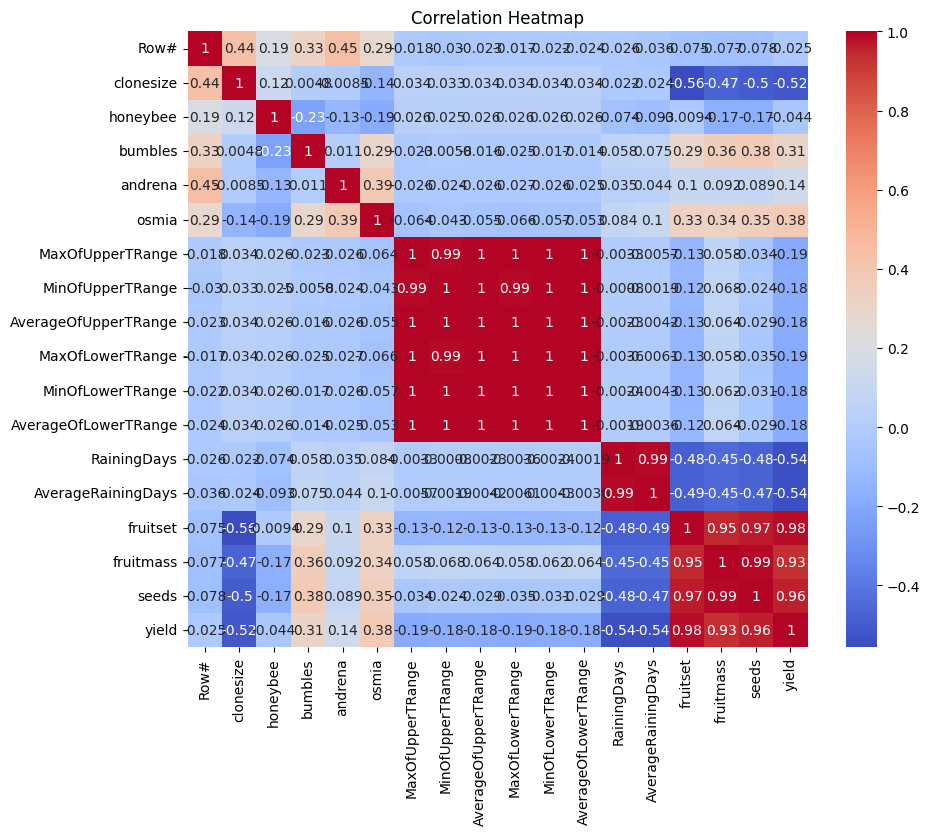

In [37]:
#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(wild_blueberry.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

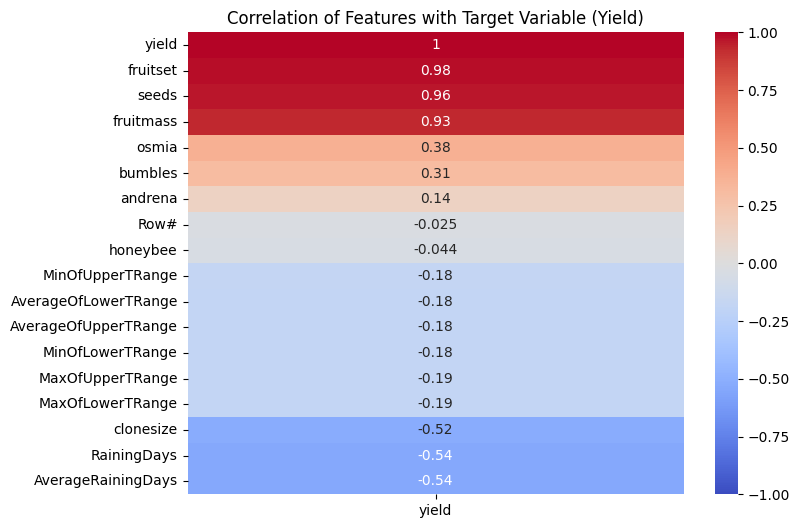

In [18]:
# Compute the correlation matrix with the target variable 'yield'
correlation_matrix = wild_blueberry.corr()

# Extract correlations with the target variable
correlation_with_target = correlation_matrix[['yield']].sort_values(by='yield', ascending=False)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Target Variable (Yield)')
plt.show()

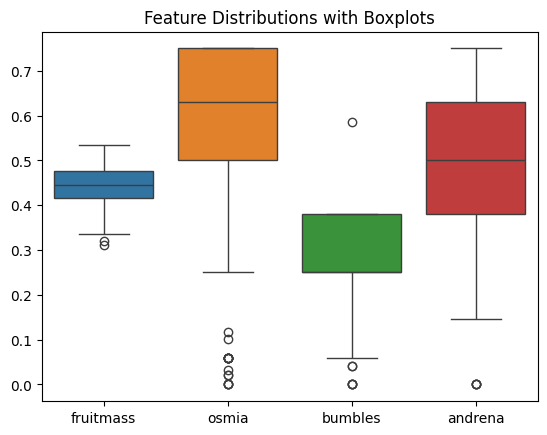

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for outliers using boxplot
sns.boxplot(data=wild_blueberry[features])
plt.title("Feature Distributions with Boxplots")
plt.show()

In [52]:
# Calculate IQR for each feature
Q1 = wild_blueberry[features].quantile(0.25)
Q3 = wild_blueberry[features].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for each feature
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
wild_blueberry_no_outliers = wild_blueberry[~((wild_blueberry[features] < lower_bound) | (wild_blueberry[features] > upper_bound)).any(axis=1)]

# Check the shape of the data before and after outlier removal
print(f"Original data shape: {wild_blueberry.shape}")
print(f"Data shape after outlier removal: {wild_blueberry_no_outliers.shape}")

Original data shape: (777, 20)
Data shape after outlier removal: (759, 20)


## MODELLING

### Linear Regression

In [39]:
X = wild_bluberry.drop('yield', axis=1)
y = wild_bluberry['yield']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate linear regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# --- Print the results ---
print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"R^2 Score: {r2_linear:.4f}\n")

Linear Regression:
Mean Squared Error (MSE): 17819.1372
R^2 Score: 0.9908



### Removing outliers

In [55]:
# Select features and target for the cleaned data (no outliers)
X_no_outliers = wild_blueberry_no_outliers.drop('yield', axis=1)
y_no_outliers = wild_blueberry_no_outliers['yield']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Train the linear regression model
linear_model_no_outliers = LinearRegression()
linear_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Predict and evaluate the model
y_pred_no_outliers = linear_model_no_outliers.predict(X_test_no_outliers)

# Evaluate performance
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
r2_no_outliers = r2_score(y_test_no_outliers, y_pred_no_outliers)

# Print the results
print(f"Linear Regression MSE after removing outliers: {mse_no_outliers:.4f}")
print(f"Linear Regression R^2 after removing outliers: {r2_no_outliers:.4f}")

Linear Regression MSE after removing outliers: 12769.0969
Linear Regression R^2 after removing outliers: 0.9928


In [47]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into train and test sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the linear model with scaled features
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_train_scaled, y_train_scaled)

# Predict and evaluate
y_pred_scaled = linear_model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)

print(f"Linear Regression with Scaled Features MSE: {mse_scaled:.4f}")
print(f"Linear Regression with Scaled Features R^2: {r2_scaled:.4f}")

Linear Regression with Scaled Features MSE: 228556.2160
Linear Regression with Scaled Features R^2: 0.8824


### Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score

# Cross-validation for linear regression
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()  # Negate because cross_val_score returns negative MSE by default
print(f"Cross-validated MSE: {mse_cv:.4f}")

Cross-validated MSE: 286140.6506


### Feature Transformation

In [50]:
import numpy as np

# Apply log transformation to features (if suitable)
wild_blueberry['fruitmass_log'] = np.log1p(wild_blueberry['fruitmass'])
wild_blueberry['seeds_log'] = np.log1p(wild_blueberry['seeds'])

# Use the transformed features for training the model
features_transformed = ['fruitset', 'seeds_log', 'fruitmass_log', 'osmia', 'bumbles', 'andrena']
X = wild_blueberry[features_transformed]

# Train and evaluate the model as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression with Transformed Features MSE: {mse_linear:.4f}")
print(f"Linear Regression with Transformed Features R^2: {r2_linear:.4f}")

Linear Regression with Transformed Features MSE: 39239.8278
Linear Regression with Transformed Features R^2: 0.9798


### Polynomial Regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data with the new features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the linear model with polynomial features
linear_model_poly = LinearRegression()
linear_model_poly.fit(X_train_poly, y_train_poly)

# Predict and evaluate
y_pred_poly = linear_model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Polynomial Regression MSE: {mse_poly:.4f}")
print(f"Polynomial Regression R^2: {r2_poly:.4f}")

Polynomial Regression MSE: 242601.0975
Polynomial Regression R^2: 0.8752


### Ridge Regression

In [44]:
from sklearn.linear_model import Ridge

# Ridge regression with L2 regularization
ridge_model = Ridge(alpha=1)  # You can tune alpha to control the regularization strength
ridge_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Ridge Regression R^2: {r2_ridge:.4f}")

Ridge Regression MSE: 689985.7557
Ridge Regression R^2: 0.6450


### Lasso Regression

In [45]:
from sklearn.linear_model import Lasso

# Lasso regression with L1 regularization
lasso_model = Lasso(alpha=0.1)  # You can tune alpha to control regularization strength
lasso_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso:.4f}")
print(f"Lasso Regression R^2: {r2_lasso:.4f}")

Lasso Regression MSE: 228619.9089
Lasso Regression R^2: 0.8824
